# Quantum Computing | Qiskit

In [1]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

In [2]:
# Importing standard Qiskit libraries and configuring account
import numpy as np
from qiskit import *
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, BasicAer, IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state, array_to_latex

from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

# Loading your IBM Q account(s)
provider = IBMQ.load_account()
%matplotlib inline


/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


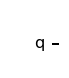

In [3]:
mycircuit = QuantumCircuit(1)
mycircuit.draw('mpl')

In [4]:

sv = Statevector.from_label('0')
sv

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))

In [5]:
array_to_latex(sv.data, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

In [6]:
sv.data

array([1.+0.j, 0.+0.j])

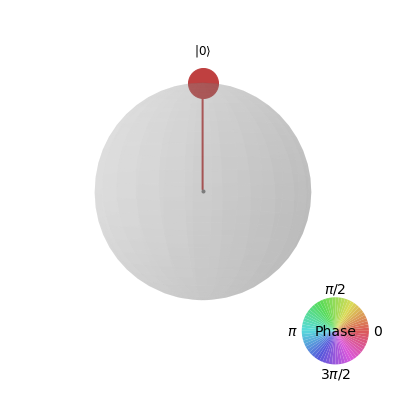

In [7]:
# plot q sphere
plot_state_qsphere(sv.data)

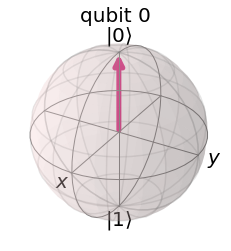

In [8]:
plot_bloch_multivector(sv)

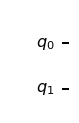

In [9]:
# define a circuit
n = 2
qc = QuantumCircuit(n)
qc.draw('mpl')

In [10]:
qc.num_qubits

2

In [11]:
# no. of qubits
qc.width()

2

<IPython.core.display.Math object>

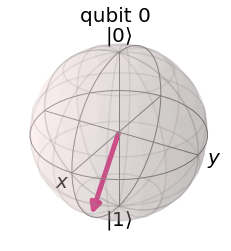

In [12]:
# Create random 1-qubit state
psi = random_state(1)

# Display it nicely
array_to_latex(psi, pretext="|\\psi\\rangle =")
# Show it on a Bloch sphere
plot_bloch_multivector(psi)

### Gates

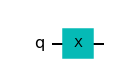

In [13]:
# X operation

mycircuit = QuantumCircuit(1)
mycircuit.x(0)

mycircuit.draw('mpl')


In [14]:
sv = Statevector.from_label('0')
new_sv = sv.evolve(mycircuit)
new_sv

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))

In [15]:
array_to_latex(sv.data, pretext="\\text{Circuit = }\n")
array_to_latex(new_sv.data, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

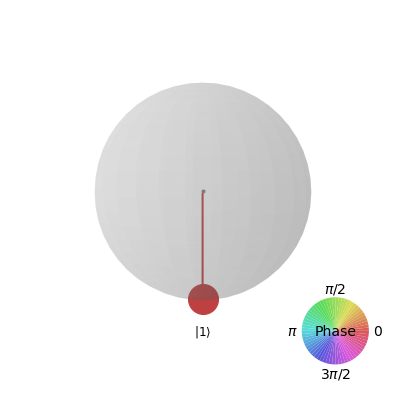

In [16]:
plot_state_qsphere(new_sv.data)

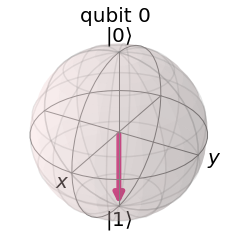

In [17]:
plot_bloch_multivector(new_sv)

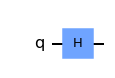

In [18]:
sv = Statevector.from_label('0')
mycircuit = QuantumCircuit(1)
mycircuit.h(0)
mycircuit.draw('mpl')

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


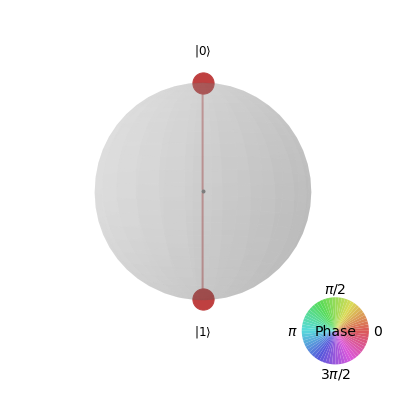

In [19]:
new_sv = sv.evolve(mycircuit)
print(new_sv)
plot_state_qsphere(new_sv.data)

In [20]:
array_to_latex(sv.data, pretext="\\text{Circuit = }\n")
array_to_latex(new_sv.data, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

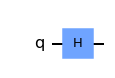

In [21]:
sv = Statevector.from_label('1')
mycircuit = QuantumCircuit(1)
mycircuit.h(0)
mycircuit.draw('mpl')

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


<IPython.core.display.Math object>

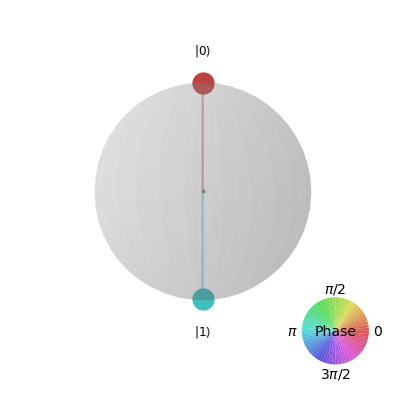

In [22]:
new_sv = sv.evolve(mycircuit)
print(new_sv)

array_to_latex(new_sv.data, pretext="\\text{Circuit = }\n")
plot_state_qsphere(new_sv.data)

In [23]:
array_to_latex(sv.data, pretext="\\text{Circuit = }\n")
array_to_latex(new_sv.data, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [24]:
#from resources.qiskit_textbook.widgets import gate_demo
#gate_demo(qsphere=True)

### Multi-state qubits

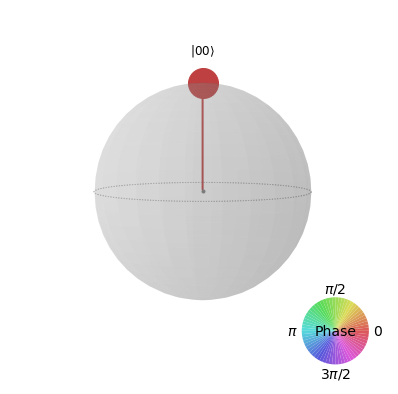

In [25]:
sv = Statevector.from_label('00')
plot_state_qsphere(sv.data)

In [26]:
array_to_latex(sv.data, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

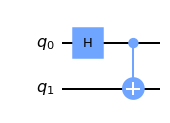

In [27]:
mycircuit = QuantumCircuit(2)
mycircuit.h(0)
mycircuit.cx(0,1)
mycircuit.draw('mpl')

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


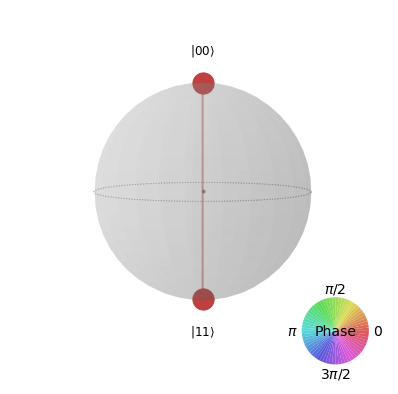

In [28]:
new_sv = sv.evolve(mycircuit)
print(new_sv)
plot_state_qsphere(new_sv.data)

In [29]:
array_to_latex(new_sv.data, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

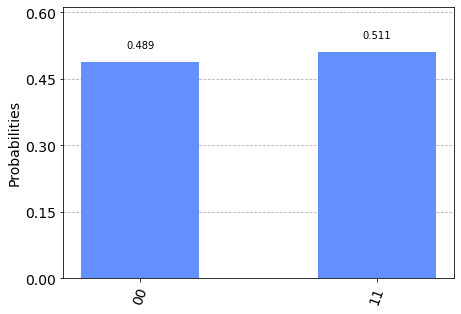

In [30]:
counts = new_sv.sample_counts(shots=1000)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

### Measurements

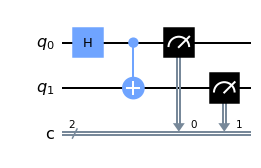

In [31]:
mycircuit = QuantumCircuit(2, 2)
mycircuit.h(0)
mycircuit.cx(0,1)
mycircuit.measure([0,1], [0,1])
mycircuit.draw('mpl')

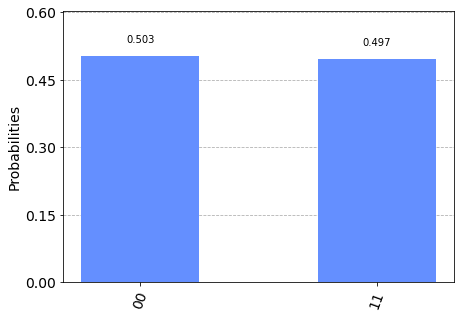

In [32]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(mycircuit, simulator, shots=10000).result()
counts = result.get_counts(mycircuit)
plot_histogram(counts)

In [33]:
from qiskit.providers.ibmq import least_busy

device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

Running on current least busy device:  ibmq_ourense


In [34]:
%%time
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

job = execute(mycircuit, backend=device, shots=1024, optimization_level=3)
job_monitor(job, interval = 2)

Job Status: job has successfully run
CPU times: user 2.34 s, sys: 138 ms, total: 2.48 s
Wall time: 8min 43s


CPU times: user 45.6 ms, sys: 0 ns, total: 45.6 ms
Wall time: 531 ms


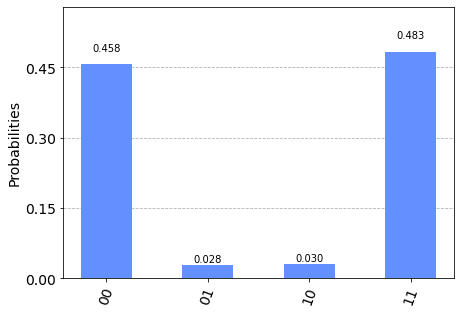

In [35]:
%%time
# Get the results from the computation
results = job.result()
answer = results.get_counts(mycircuit)
plot_histogram(answer)

In [36]:
%%time
print("===")

===
CPU times: user 53 µs, sys: 21 µs, total: 74 µs
Wall time: 82 µs


### More about circuits

In [37]:
# define a circuit
n = 5
qc = QuantumCircuit(n+1)
qc

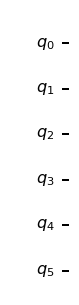

In [38]:
qc.draw()

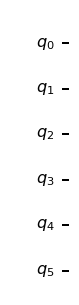

In [39]:
qc.draw('mpl')

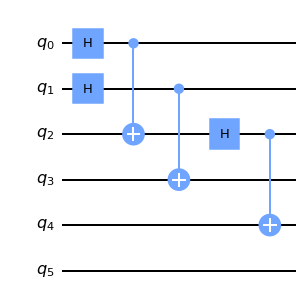

In [40]:
for idx in range(3):
    qc.h(idx)
    qc.cx(idx, idx+2)

qc.draw()

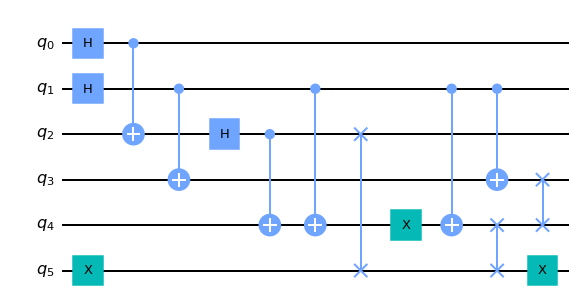

In [41]:
qc.cx(1, n-1)
qc.x(n-1)
qc.cx(1, n-1)
qc.x(n)
qc.cx(1, n-2)
qc.swap(n, n-3)
qc.swap(n-1, n)
qc.swap(n-2, n-1)
qc.x(n)

qc.draw()

In [42]:
# no. of qubits
qc.width()

6

In [43]:
qc.num_qubits

6

In [44]:
# count no. of gatewise operations
qc.count_ops()

OrderedDict([('cx', 6), ('h', 3), ('x', 3), ('swap', 3)])

In [45]:
# total no. of operations
qc.size()

15

In [46]:
# depth?
qc.depth()

9

In [47]:
qc.num_unitary_factors()

1

<IPython.core.display.Math object>

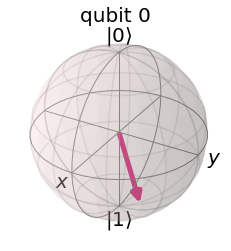

In [48]:
# Create random 1-qubit state
psi = random_state(1)

# Display it nicely
array_to_latex(psi, pretext="|\\psi\\rangle =")
# Show it on a Bloch sphere
plot_bloch_multivector(psi)

<IPython.core.display.Math object>

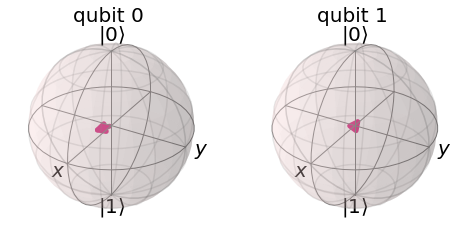

In [49]:
# Create random 1-qubit state
psi = random_state(2)

# Display it nicely
array_to_latex(psi, pretext="|\\psi\\rangle =")
# Show it on a Bloch sphere
plot_bloch_multivector(psi)